In [1]:
import numpy as np
from matplotlib import pyplot as plt

from synet.networks import random_network
from synet.process import DelayProcess, DiseaseProcess, MajorityProcess, PredatorProcess
from synet.utils import apply_process, apply_measures
from synet.visualization import plot_process_results, plot_measure_results
from synet.visualization import plot_process_v_measure, plot_pvm_dt, plot_measure_v_process

In [2]:
n_networks = 300
process_dt = 250
n_events = 5000
np.random.seed(1298734)

In [3]:
processes = {
    "delay": {"process": DelayProcess(), "n_sim": 10000, "n_jobs": 32},
    "majority": {"process": MajorityProcess(), "n_sim": 1000, "n_jobs": 32},
    "disease": {"process": DiseaseProcess(), "n_sim": 1000, "n_jobs": 32},
    "predator": {"process": PredatorProcess(), "n_sim": 2000, "n_jobs": 32},
}

In [4]:
%%time
networks = [random_network(n_events=n_events) for _ in range(n_networks)]

CPU times: user 43.1 s, sys: 19.6 ms, total: 43.1 s
Wall time: 43.2 s


In [5]:
%%time
process_results = {}
for name, process_args in processes.items():
    res = apply_process(networks, dt=process_dt, **process_args)
    process_results[name] = res


start procs
put jobs
get results
signal finish
join procs
done
start procs
put jobs
get results
signal finish
join procs
done
start procs
put jobs
get results
signal finish
join procs
done
start procs
put jobs
get results
signal finish
join procs
done
CPU times: user 1.45 s, sys: 5.61 s, total: 7.05 s
Wall time: 1h 16s


In [6]:
%%time
measure_results = apply_measures(networks, max_dt=100, n_jobs=16)


CPU times: user 510 ms, sys: 4.07 s, total: 4.58 s
Wall time: 45.5 s


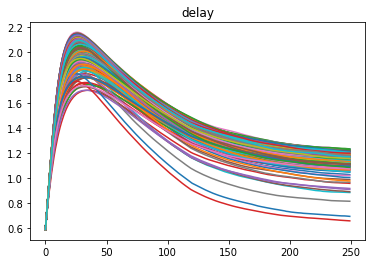

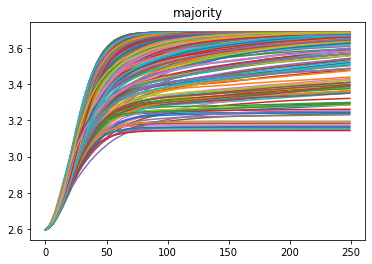

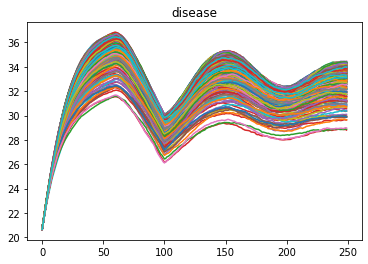

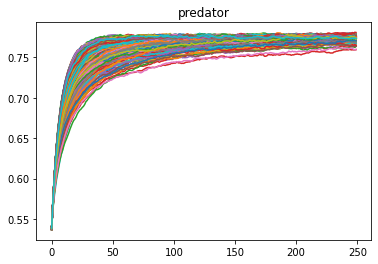

In [7]:
for name, res in process_results.items():
    plt.title(name)
    plot_process_results(res)
    

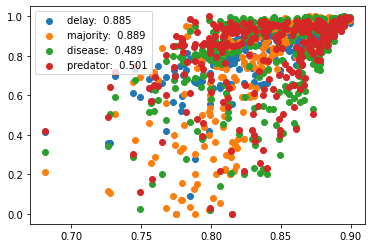

In [8]:
plot_measure_v_process(measure_results, process_results)

In [10]:
import pandas as pd

def write_csv(process_results, measure_results, fp):
    df = pd.DataFrame()
    n_network = len(process_results[list(process_results)[0]])
    df['net_id'] = np.arange(n_network)
    for name, res in process_results.items():
        df[name] = [np.mean(r) for r in res]
    for name, res in measure_results.items():
        df[name] = [np.mean(r) for r in res]
    df.to_csv(fp, index=False)
    return df

#df = write_csv(process_results, measure_results, "comparison2.csv")
#df = pd.read_csv("comparison.csv")
print(df)

     net_id     delay  majority    disease  predator   overlap     agent  \
0         0  1.427152  3.183760  33.130856  0.767174  0.813592  3.513998   
1         1  1.500728  3.534657  33.023756  0.766364  0.860987  3.499261   
2         2  1.501741  3.540269  33.089476  0.766865  0.866925  3.512701   
3         3  1.436598  3.297263  32.547356  0.765952  0.808684  3.463158   
4         4  1.528602  3.558148  33.128520  0.767391  0.896548  3.511448   
..      ...       ...       ...        ...       ...       ...       ...   
295     295  1.431392  3.241567  32.940392  0.765466  0.814589  3.487851   
296     296  1.311843  3.403656  28.730536  0.735020  0.799042  3.095421   
297     297  1.469266  3.551904  31.579484  0.758538  0.862445  3.324183   
298     298  1.439937  3.527508  31.239316  0.756269  0.866581  3.328887   
299     299  1.484056  3.469577  32.860420  0.766049  0.827928  3.478448   

         mixing        path       paint  
0    121.165067  103.943803  128.632677  
1  

In [11]:
from scipy.stats import spearmanr
import numpy as np
from matplotlib import pyplot as plt

In [12]:
n_list = len(list(df))

cor_matrix = np.zeros((n_list, n_list))
for i_1, name_1 in enumerate(list(df)):
    for i_2, name_2 in enumerate(list(df)):
        cor_matrix[i_1, i_2] = spearmanr(df[name_1], df[name_2]).correlation
        

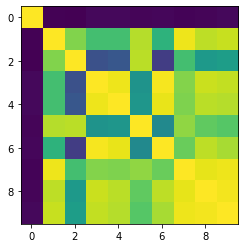

In [13]:
plt.imshow(cor_matrix)
plt.show()

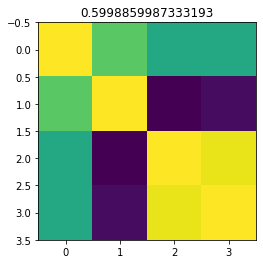

In [14]:
# Internal correlation average:

plt.imshow(cor_matrix[1:5, 1:5])
plt.title(str((np.sum(cor_matrix[1:5, 1:5])-4)/12))
plt.show()
print()

In [15]:
# measures
for col in range(5, n_list):
    avg = np.mean(cor_matrix[col, 1:5])
    print(list(df)[col], avg)


overlap 0.6910103445593839
agent 0.681240347114968
mixing 0.8157209524550273
path 0.8044950499449993
paint 0.8078023089145434


In [16]:
# processes
for col in range(1, 5):
    avg = (np.sum(cor_matrix[col, 1:5])-1)/3
    print(list(df)[col], avg)

delay 0.7248655355429875
majority 0.4165521839131546
disease 0.6250451671685241
predator 0.6330811083086108


In [17]:
avg = np.zeros(n_networks)
for pr_name in list(df)[1:5]:
    order = np.argsort(df[pr_name].values)
    true_order = np.empty_like(order, dtype=int)
    true_order[order] = np.arange(len(order), dtype=int)

    avg += true_order

new_order = avg/4

corr = []
for pr_name in list(df)[1:5]:
    corr.append(spearmanr(new_order, df[pr_name].values).correlation)

print("best case:", np.mean(corr))

best case: 0.8351394574495072
